# Defining Probablity

\begin{equation*}
p(A,B)=p(A|B)*p(B)
\end{equation*}
$p(A,B)$          Join Probablity

$p(A|B)$          Conditional Probablity

$p(A|B)$=$p(A)$   Only if A & B are independent 

## Probablity Distribution 

<div class="alert alert-block alert-info">
<b>Random Variable:</b> A variable whose values are outcome of a statistical experiment.<br>
Random variable is represented by capital letter; $X$<br>
</div>

Instant of random variable $X$ is shown by lower letetr $x$ and represenets one (or more) value(s) of the $X$.<br>
__Probabality Distribution__: relative llikelihood of all possible outcomes 

There are two types of random variables: __continuous__ and __discrete__. <br>__Continuous variables__ can take any value from some interval (we can use Python floats to represent them), and<br> __discrete variables__ can take only certain values (we can use Python integers to represent them).

In [24]:
from scipy import stats

μ = 0
σ = 1 
X = stats.norm(μ, σ)
x = X.rvs(3); x 

array([-0.33212968,  0.66829699,  0.57857569])

\begin{equation*}
x \sim N(\mu, \sigma)
\end{equation*}





\begin{equation*}
p(x|\mu, \sigma)= \frac{1} {\sigma \sqrt{2\pi}} e^\frac{-(x-\mu)^2} {2{\sigma}^2} 
\end{equation*}

# Dependent Variables 

,Year,Month,CO2,Seasonaly_adjusted,Fit,Seasonally_adjusted_fit,CO2_filled,Seasonally_adjusted_filled
2,1958,3,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,315.86,315.18,315.87,315.22,315.86,315.18
7,1958,8,314.93,316.18,314.00,315.29,314.93,316.18


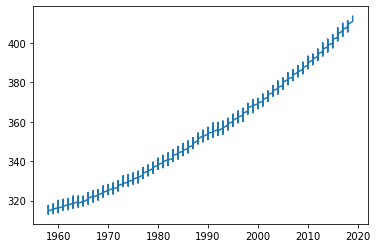

In [62]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

monthly_data = pd.read_csv('monthly_in_situ_co2_mlo.csv', header=56)
monthly_data.replace(to_replace=-99.99, value=np.nan, inplace=True)

cols = ["Year", "Month", "--", "--", "CO2", "Seasonaly_adjusted", "Fit",
        "Seasonally_adjusted_fit", "CO2_filled", "Seasonally_adjusted_filled"]
monthly_data.columns = cols
cols.remove("--"); cols.remove("--")
monthly_data = monthly_data[cols]
monthly_data.dropna(inplace=True)

# sns.lineplot(x='Year', y='CO2', data=monthly_data)
plt.plot(monthly_data['Year'],  monthly_data['CO2'])
monthly_data.head()

# Baye's theorem 

$$p\propto \mathcal N(\mu, \sigma)$$

\begin{equation*}
p(\theta \mid y)=\frac{p(y \mid \theta)p(\theta)}{p(y)}
\end{equation*}


> - $p(\theta)$:   prior<br>
> - $p(y|\theta)$:   likelihood<br>
> - $p(y)$: marginal likelihood<br>
> - $p(\theta|y)$:   posterior 

\begin{equation*}
p(\theta \mid y) \propto p(y \mid \theta)p(\theta)
\end{equation*}

\text{"Probabilities are used to measure the uncertainty we have about parameters, and Bayes' theorem is the mechanism to correctly update those probabilities in light of new data, hopefully reducing our uncertainty."}

## Coin flipping toss: Is the coin biased?

__Binomial Distribution__ for Likelihood:<br>
probability of getting  heads (or in general, successes) out of  coin tosses (or in general, trials or experiments) given a fixed value of \theta
\begin{equation*}
p(y\mid\theta, N)=\frac{N!}{y!(N-y)!}{\theta}^y{(1-\theta)^{N-y}}
\end{equation*}

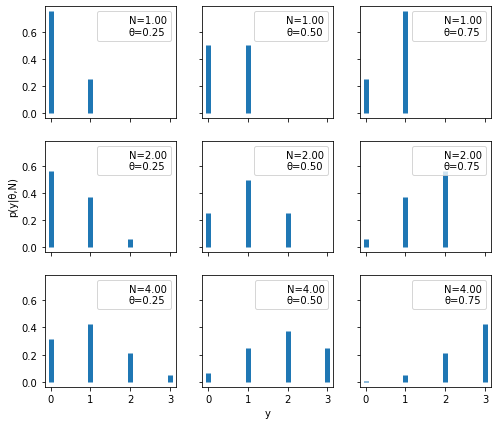

In [74]:
n_ = [1, 2, 4]
p_ = [0.25, 0.5, 0.75]

x = np.arange(0, len(n_)+1)
fig, ax = plt.subplots(nrows=len(n_), ncols=len(p_), sharex=True, sharey=True, figsize=(8,7))

for i in range(len(n_)):
    for j in range(len(p_)):
        n = n_[i]
        p = p_[j]
        
        y = stats.binom(n,p).pmf(x)
        
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].plot(0, 0, label="N={:3.2f}\nθ={:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()
        ax[1,0].set_ylabel('p(y|θ,N)')
        ax[2,1].set_xlabel('y')

__$\beta$__ funtion for prior:
\begin{equation*}
p(\theta)=\frac{\Gamma(\alpha+\beta)}{{\Gamma(\alpha)}{\Gamma(\beta)}}{\theta}^{\alpha-1} (1-\theta)^{\beta-1}
\end{equation*}

Text(0.07, 0.5, 'p(θ)')

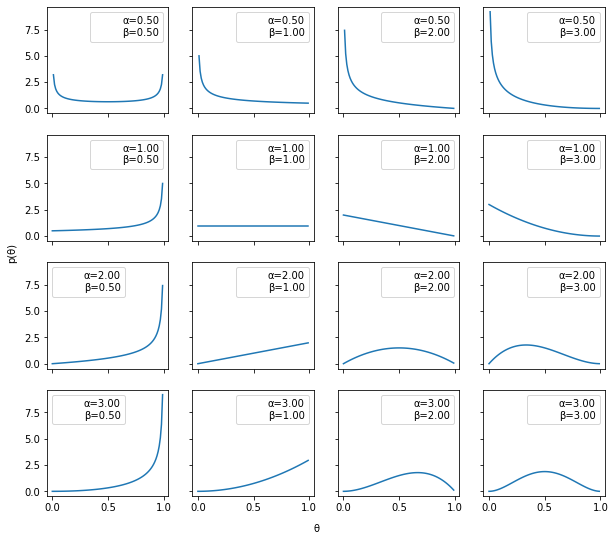

In [86]:
p_ = [0.5, 1, 2, 3]
x = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(nrows=len(p_), ncols=len(p_), sharex=True, sharey=True, figsize=(10,9))

for i in range(len(p_)):
    for j in range (len(p_)):
        α = p_[i]
        β = p_[j]
        
        y = stats.beta(α, β).pdf(x)
        
        ax[i,j].plot(x,y)
        ax[i,j].plot(0,0, label="α={:3.2f}\nβ={:3.2f}".format(α, β), alpha=0)
        ax[i,j].legend()

fig.text(0.5,0.07, 'θ', ha='center')
fig.text(0.07,0.5, 'p(θ)', va='center', rotation=90)
        


__Posterior__:
\begin{equation*}
p(\theta \mid y)\propto\frac{N!}{y!(N-y)!}{\theta}^y{(1-\theta)^{N-y}}\frac{\Gamma(\alpha+\beta)}{{\Gamma(\alpha)}{\Gamma(\beta)}}{\theta}^{\alpha-1} (1-\theta)^{\beta-1}
\end{equation*}

\begin{equation*}
p(\theta \mid y)\propto{\theta}^y{(1-\theta)^{N-y}}{\theta}^{\alpha-1} (1-\theta)^{\beta-1}
\end{equation*}

\begin{equation*}
p(\theta \mid y)\propto{\theta}^{y+\alpha-1}{(1-\theta)^{N-y+\beta-1}}        
\end{equation*}

\begin{equation*}
p(\theta \mid y)\propto Beta({\alpha_{prior}+y}, \beta_{prior}+N-y)        
\end{equation*}

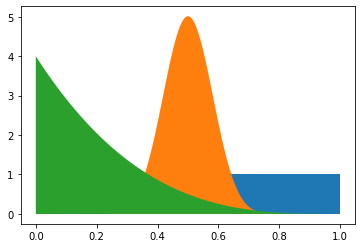

In [89]:
x = np.linspace(0, 1, 200)

beta_param = [(1,1), (20,20), (1,4)]

for (a_, b_) in beta_param:
    p_y = stats.beta.pdf(x, a_, b_)
    plt.fill_between(x, 0, p_y)

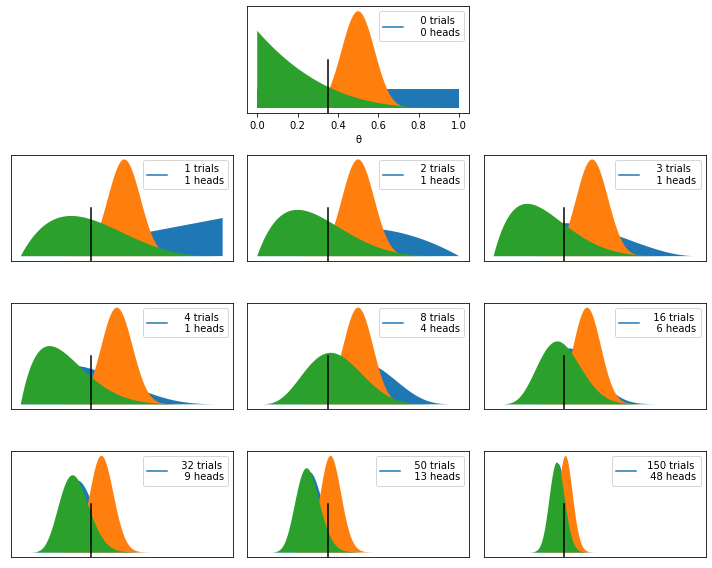

In [103]:
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
x = np.linspace(0, 1, 200)

θ_real = 0.35
    
beta_param = [(1,1), (20,20), (1,4)]

plt.figure(figsize=(10,8))
for idx, n in enumerate(n_trials):
    y=data[idx]
    
    if idx==0:
        plt.subplot(4,3,2)
        plt.xlabel('θ')
    else:
        plt.subplot(4,3, idx+3)
        plt.xticks([])

    for (a_, b_) in beta_param:
        p_y = stats.beta.pdf(x, a_+y, b_+n-y)
        plt.fill_between(x, 0, p_y)
        
    plt.axvline(θ_real, ymax=0.5, c='k')
    plt.plot(0,0, label=f'{n:4d} trials\n{y:4d} heads')
    plt.legend()
    plt.yticks([])

plt.tight_layout()

### HPD: Highest Posterior Density

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1eef44e0>],
      dtype=object)

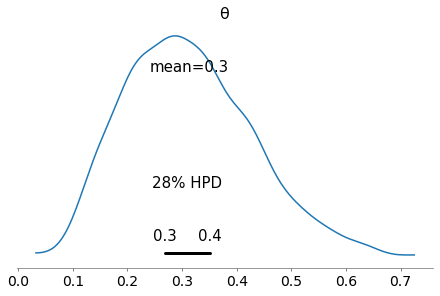

In [119]:
import arviz as az 

np.random.seed(1)
az.plot_posterior({"θ": stats.beta.rvs(5, 11, size=1000)}, credible_interval=0.28 )

### PPC: Posterior Predictive Check
\begin{equation*}
p (\,\hat{y} \mid y\,) \,=\,\int  p(\, \hat{y} \mid \theta\,) \, p(\, \theta \mid y\,) \, \mathrm{d} \theta
\end{equation*}


1. We sample a value of $\theta$ from the posterior, $p(\, \theta\,|\, y\,)$<br>
2. We feed that value of $\theta$ to the likelihood (or sampling distribution if you wish), thus obtaining a data point,$\hat{y}$ 






# Bayesian statistics using Probabilistic Programming Language (PPL)

Generally, we refer to the knowns as data and treat it like a constant, and the unknowns as parameters and treat them as probability distributions. In more formal terms, we assign probability distributions to unknown quantities. Then, we use Bayes' theorem to transform the prior probability distribution  into a posterior distribution . 

## Flipping coin: PyMC3 way

\begin{equation*}
\theta \sim Beta(\alpha, \beta)\\
y \sim Bern(n=1, p=\theta)
\end{equation*}

In [152]:
import pymc3 as pm

p = 0.35
n_trials = 9
np.random.seed(11)
data = stats.bernoulli.rvs(p, size=n_trials, random_state=12)

##alternative 
# data_2 = stats.bernoulli(p).rvs(size=n_trials, random_state=12)

with pm.Model() as our_first_model: #everything within with block will be assigend to our_first_model
    θ = pm.Beta('θ', alpha=1, beta=1) #this is prior
    y = pm.Bernoulli('y', p=θ, observed=data) #this is likelihood 
    trace = pm.sample(draws=1000, chains=2, cores=2, random_seed=123) #this is inference from poterior 

#total sampling: #chains*draws+ tune*(chains): default tune=500
#discarded sampling = tune*(chains)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:00<00:00, 3801.81draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.457,0.146,0.189,0.735,0.005,0.004,783.0,783.0,803.0,1536.0,1.0


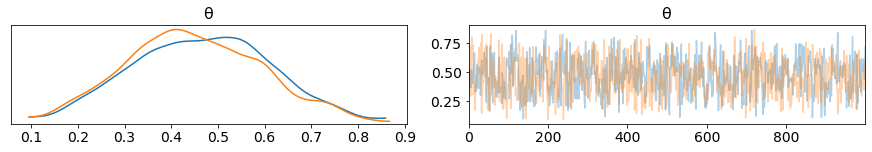

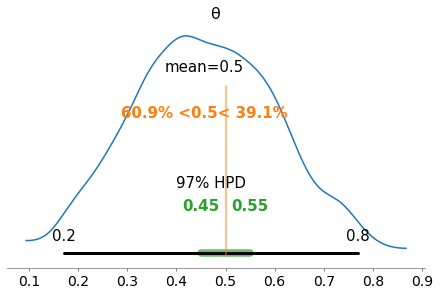

In [162]:
az.plot_trace(trace)

#two sub-plots per unknown parameters; we only have one here (θ)
#the left graph is KDE and it is similar to histograpm; since we have two chains, we got two samples 
#the left graph is individual inference at each sampling 

az.plot_posterior(trace, credible_interval=0.97, rope=[0.45,0.55], ref_val=0.5)
az.summary(trace)

#ROPE: Region Of Preactical Equivalance
#ref_val: Reference value; this is used to for making a decision on posterior inference.

## Making a decision on posterior inference

- ROPE <br>
- Reference_Value <br>
- Loss Function <br>

### Loss Function 

Text(0.457286432160804, 0.051414216817007266, '0.46')

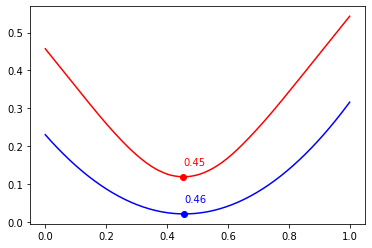

In [180]:
grid = np.linspace(0,1 , 200)
θ_pos = trace['θ']; θ_pos.shape 

l_a = [np.mean(abs(i - θ_pos)) for i in grid]
l_b = [np.mean(abs(i - θ_pos)**2) for i in grid]

plt.plot(grid, l_a, c='r')
plt.plot(grid, l_b, c='b')

m_a = np.argmin(l_a)
m_b = np.argmin(l_b)
plt.plot(grid[m_a], l_a[m_a], 'o', c='r')
plt.plot(grid[m_b], l_b[m_b], 'o', c='b')
plt.annotate("{:.2f}".format(grid[m_a]), (grid[m_a], l_a[m_a]+0.03), c='r')
plt.annotate("{:.2f}".format(grid[m_b]), (grid[m_b], l_b[m_b]+0.03), c='b')



## Gaussian Distribution Example: Chemical Shift

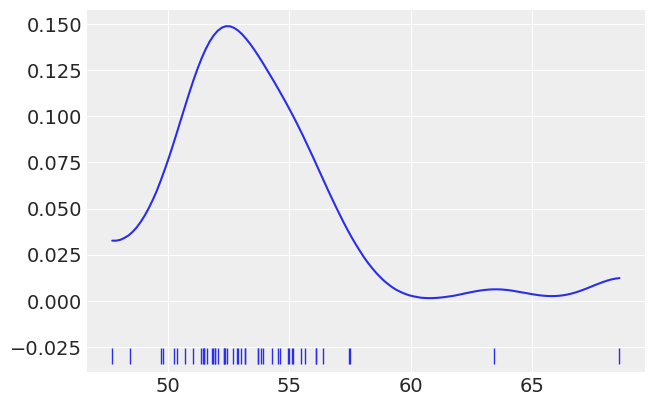

In [208]:
az.style.use('arviz-darkgrid')
c_p = "/Users/alieftekhari/Downloads/Bayesian-Analysis-with-Python-Second-Edition-master/data/chemical_shifts.csv"
chemical_shift = pd.read_csv(c_p, header=None)

az.plot_kde(chemical_shift, rug=True)

\begin{equation*}
\mu \, \sim U(l,h)\\
\sigma \, \sim |\mathcal N(0, \sigma_{\sigma}|\\
y \, \sim \mathcal N(\mu, \sigma)\\
\end{equation*}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2830.92draws/s]


(<matplotlib.axes._subplots.AxesSubplot at 0x1c22256748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c20d89ba8>)

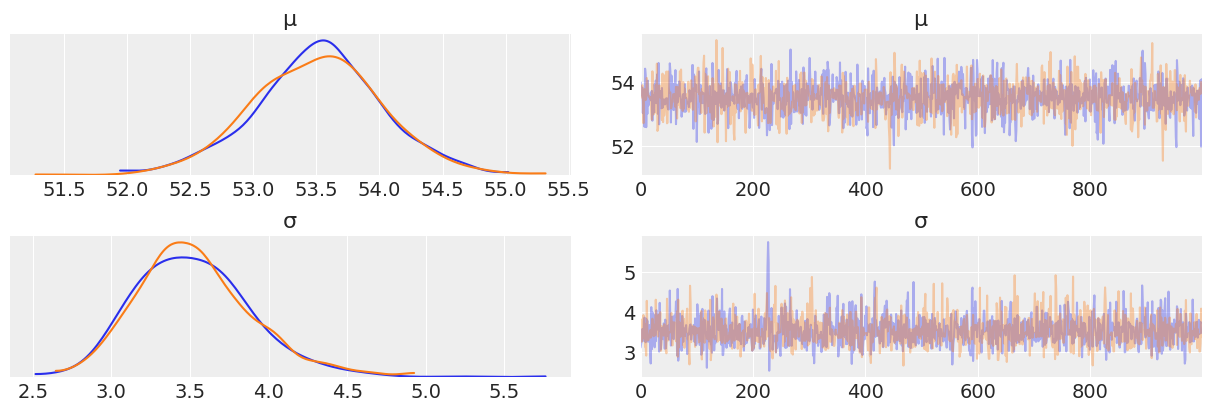

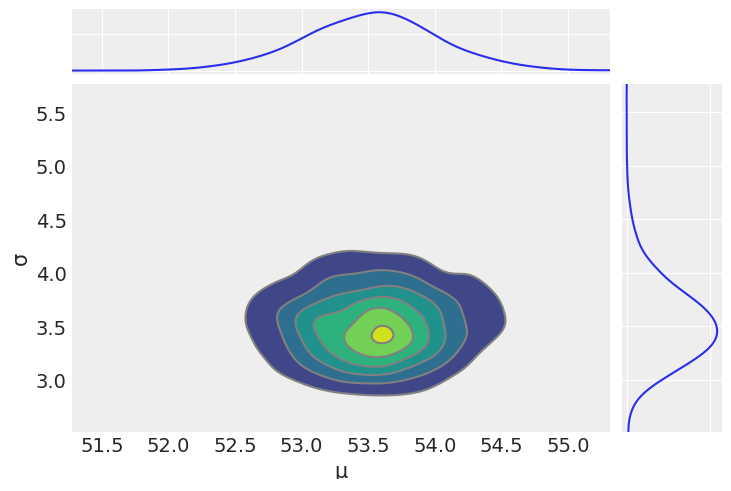

In [210]:
cussion= chemical_shift.std()
l = chemical_shift.min() - cussion
h = chemical_shift.max() + cussion

with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sd=10)
    
    y = pm.Normal('y', μ, σ, observed = chemical_shift)
    
    trace_g = pm.sample(draws=1000, chains=2, cores=2)

az.plot_trace(trace_g)
az.plot_joint(trace_g, kind='kde', fill_last=False)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,53.511,0.505,52.521,54.442,0.011,0.008,2016.0,2016.0,2046.0,1467.0,1.0
σ,3.531,0.369,2.913,4.273,0.009,0.006,1829.0,1766.0,1900.0,1314.0,1.0


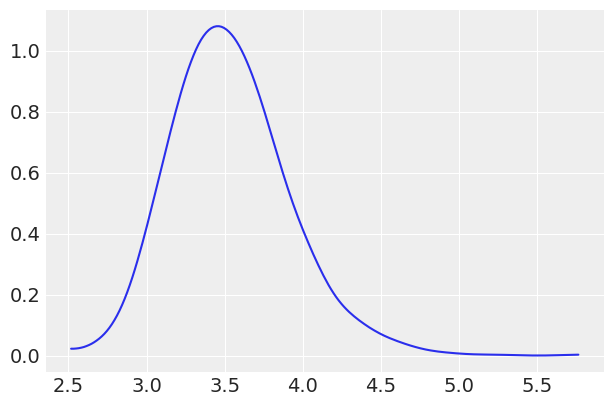

In [211]:
# az.plot_kde(trace_g['μ'])
az.plot_kde(trace_g['σ'])
az.summary(trace_g)

### Prediction from Posterior 

In [212]:
ŷ_g = pm.sample_posterior_predictive(trace_g, samples=100, model=model_g)

100%|██████████| 100/100 [00:00<00:00, 1164.56it/s]


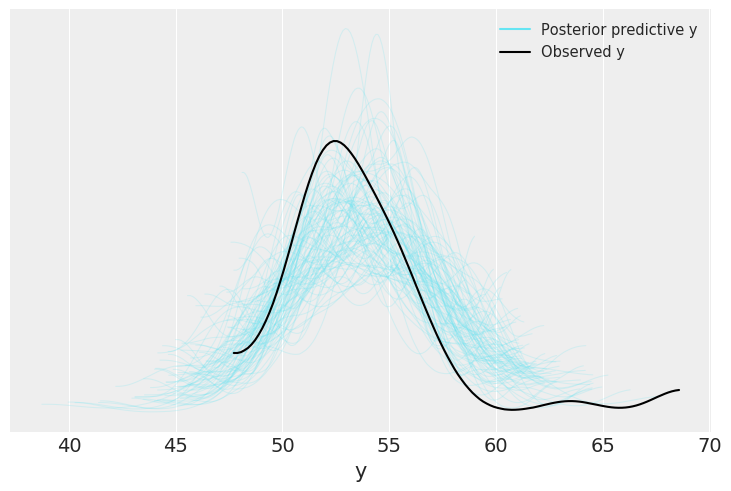

In [213]:
data_ppc = az.from_pymc3(trace_g, posterior_predictive=ŷ_g)
ax = az.plot_ppc(data_ppc, mean=False)

### student t-distribution 

when $\nu$(degrees of freedom) becomes large, t-distribution becomes normal distribution 

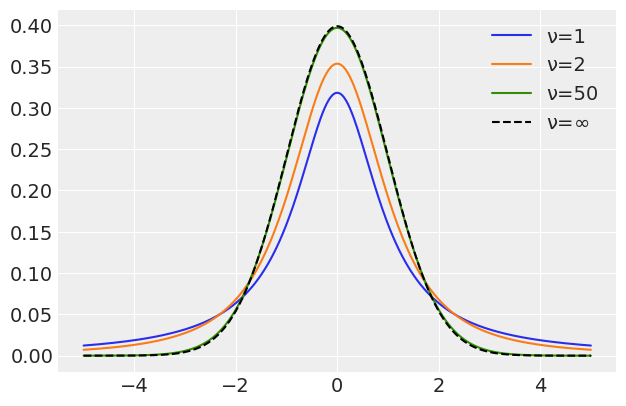

In [233]:
np.mean(stats.t(loc=0, scale=1, df=200).rvs(100))

dfs = [1, 2, 50]

xf = np.linspace(-5, 5, 500)
for df in dfs:
    plt.plot(xf, stats.t(df).pdf(xf), label = f'ν={df}')
    plt.legend()
    
n_pdf = stats.norm.pdf(xf)
plt.plot(xf, n_pdf, 'k--', label='ν=$\infty$')
plt.legend()

\begin{equation*}
\mu \, \sim U(l,h)\\
\sigma \, \sim |\mathcal N(0, \sigma_{\sigma}|\\
\nu \, \sim Exp(\lambda)\\
y \, \sim \mathcal N(\mu, \sigma, \nu)\\
\end{equation*}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, μ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1726.43draws/s]
The acceptance probability does not match the target. It is 0.8879530698908809, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,53.020,0.379,52.386,53.787,0.010,0.007,1509.0,1506.0,1515.0,1067.0,1.0
σ,2.187,0.384,1.482,2.904,0.011,0.008,1162.0,1162.0,1148.0,979.0,1.0
ν,4.500,3.230,1.199,9.039,0.100,0.071,1040.0,1040.0,1310.0,1007.0,1.0


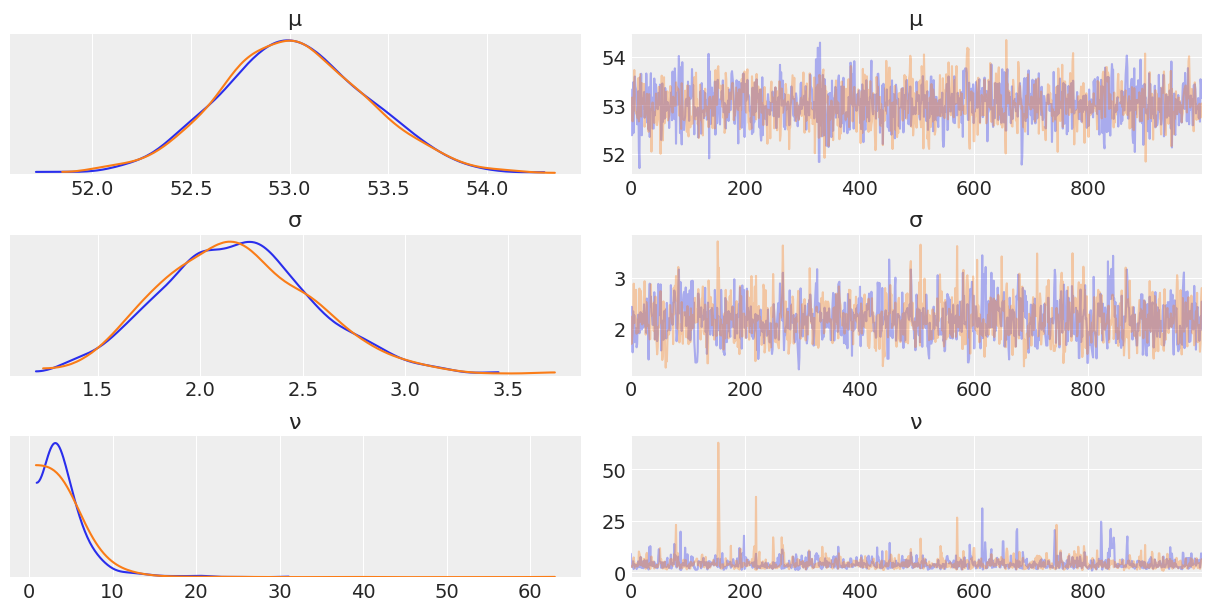

In [236]:
with pm.Model() as model_t:
    μ = pm.Uniform('μ', lower=40, upper=75)
    σ = pm.HalfNormal('σ', 10)
    ν = pm.Exponential('ν', 1/30)
    
    y = pm.StudentT('y', mu=μ, sd=σ, nu=ν, observed=chemical_shift)
    
    trace_t = pm.sample(draws=1000, chains=2, cores=2)

az.plot_trace(trace_t)
az.summary(trace_t)

100%|██████████| 100/100 [00:00<00:00, 1467.20it/s]


(40, 70)

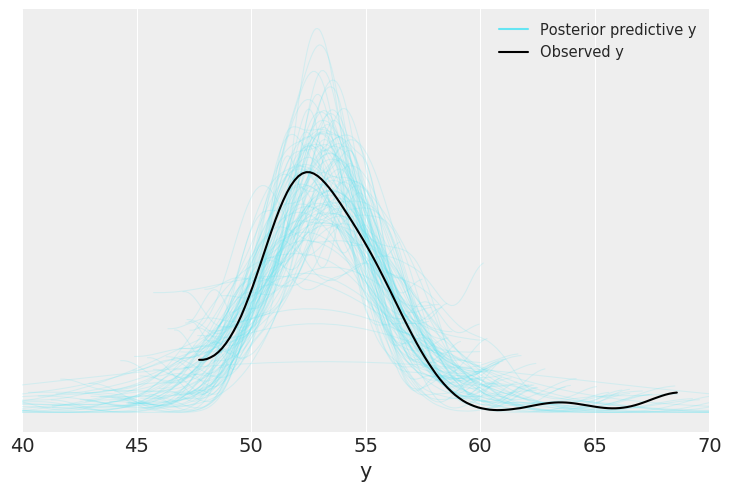

In [238]:
ŷ_t = pm.sample_posterior_predictive(trace_t, 100, model=model_t, random_seed=123)

data_ŷ_t = az.from_pymc3(trace=trace_t, posterior_predictive=ŷ_t)
az.plot_ppc(data_ŷ_t, mean=False)
plt.xlim(40, 70)

# p-value and why it is not enough

__p-Value__: is the probability that the observed difference between two groups is due to chance.  

__Problem with Null Hypothesis Statistical Testing__:The most critical problem of NHST is to provide a simple and dichotomous decision in terms of a "yes" or a "no".  However, it is unscientific to assert that the statistical results are significantly "yes" or "no" with a predetermined error rate. The NHST results do not indicate the magnitude of the treatment effect nor the precision of measurement. Treatment effects of specific medication cannot be categorically assessed into "yes" or "no" decisions. Instead, statistical results should clearly describe the magnitude of expected effects from the treatment. By using CI and effect size (ES), it is possible to explain the statistical results at some length.

## Cohen's d
Cohen's d is a way to measure the effect size, where the difference of the means are standardized by considering the pooled standard deviations of both groups.



\begin{equation*}
\delta = \frac{\mu_2-\mu_1}  {\sqrt{\frac {\sigma_2^2 - \sigma_1^2}{2} } }
\end{equation*}



## Probability of superiority
\begin{equation*}
ps = \Phi (\frac{\delta}{\sqrt{2}})
\end{equation*}



## Tip dataset

In [252]:
p_tip = '/Users/alieftekhari/Downloads/Bayesian-Analysis-with-Python-Second-Edition-master/data/tips.csv'
tips = pd.read_csv(p_tip)

tips.head()

y_tip = tips['tip'].values
# idx_day = pd.Categorical(tips['day'], categories=['Thur', 'Fri','Sat', 'Sun']).codes


idx_day = pd.Categorical(tips['day'], categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups_tips = len(np.unique(idx_day))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


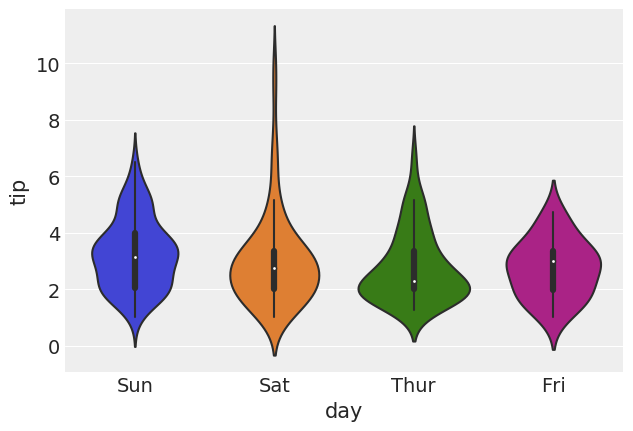

In [241]:
sns.violinplot(x='day', y='tip', data=tips)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:11<00:00, 988.74draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c261c7748>,
      dtype=object)

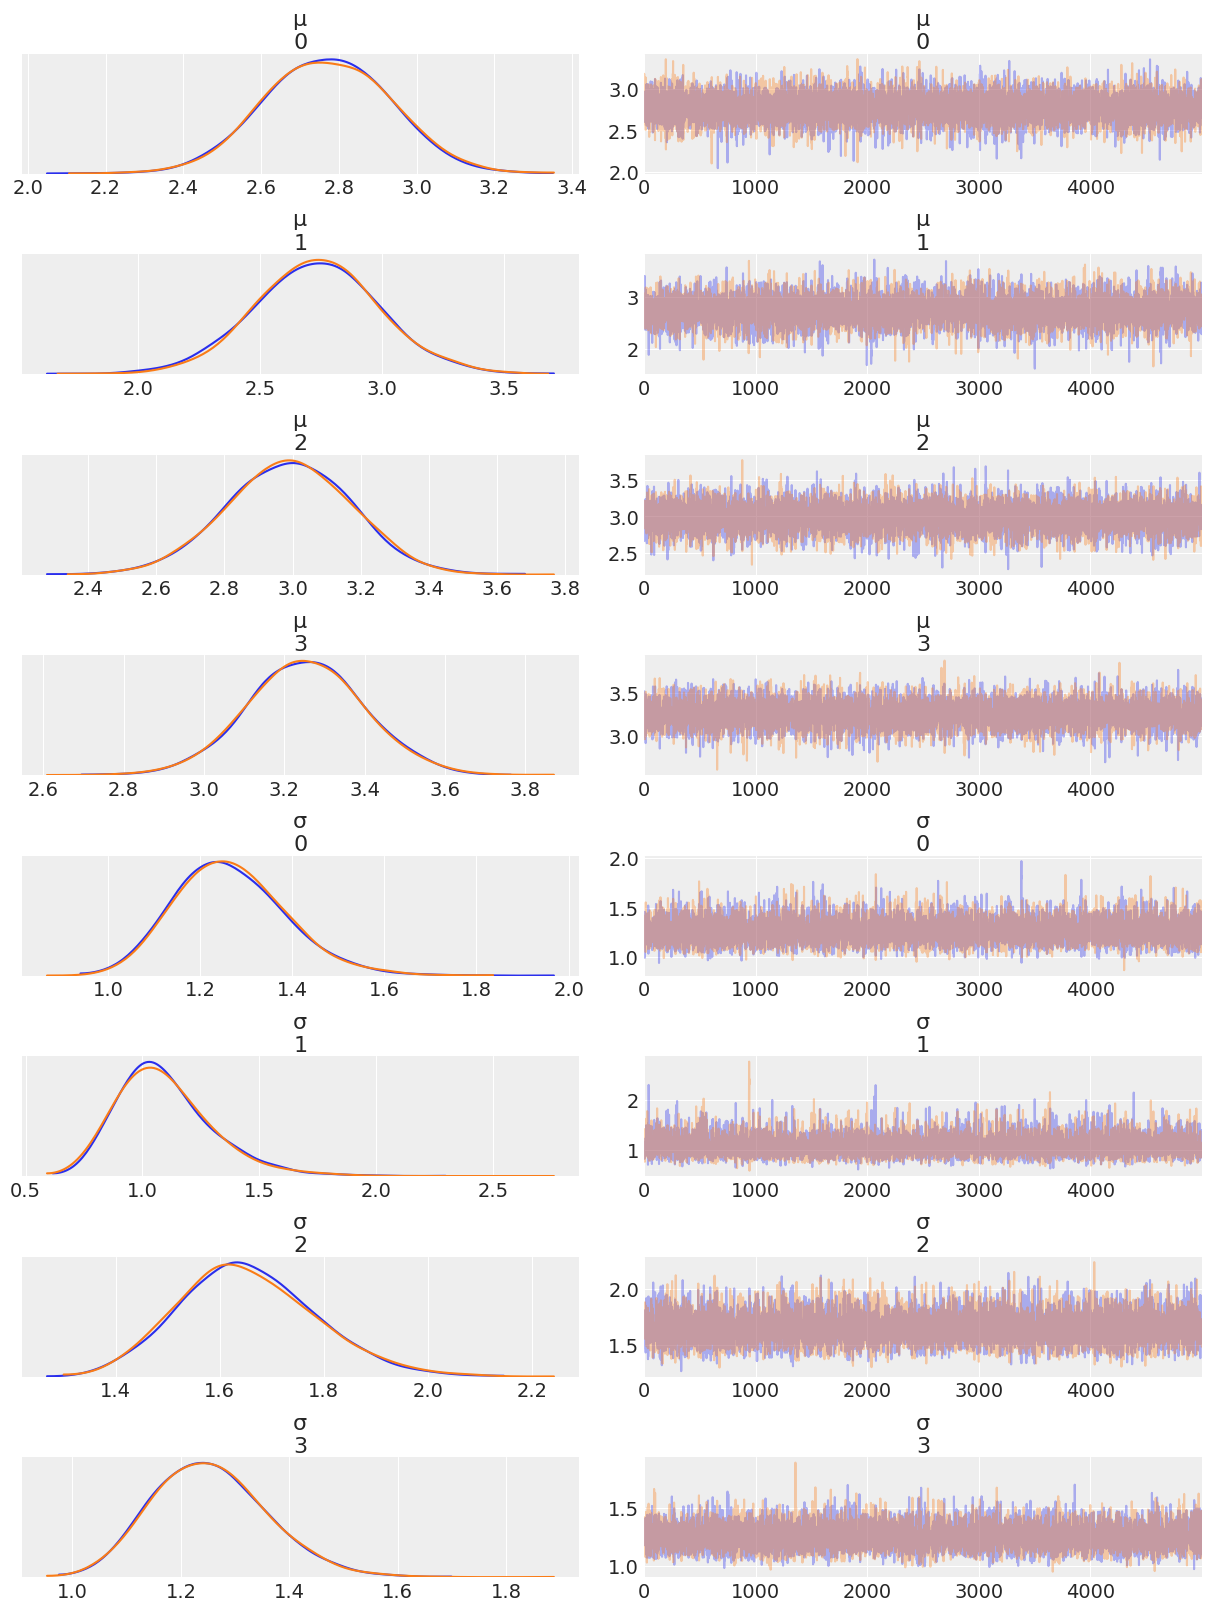

In [255]:
tip = tips['tip'].values
idx = pd.Categorical(tips['day'], categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)

    trace_cg = pm.sample(5000, chains=2, cores=2)
az.plot_trace(trace_cg)


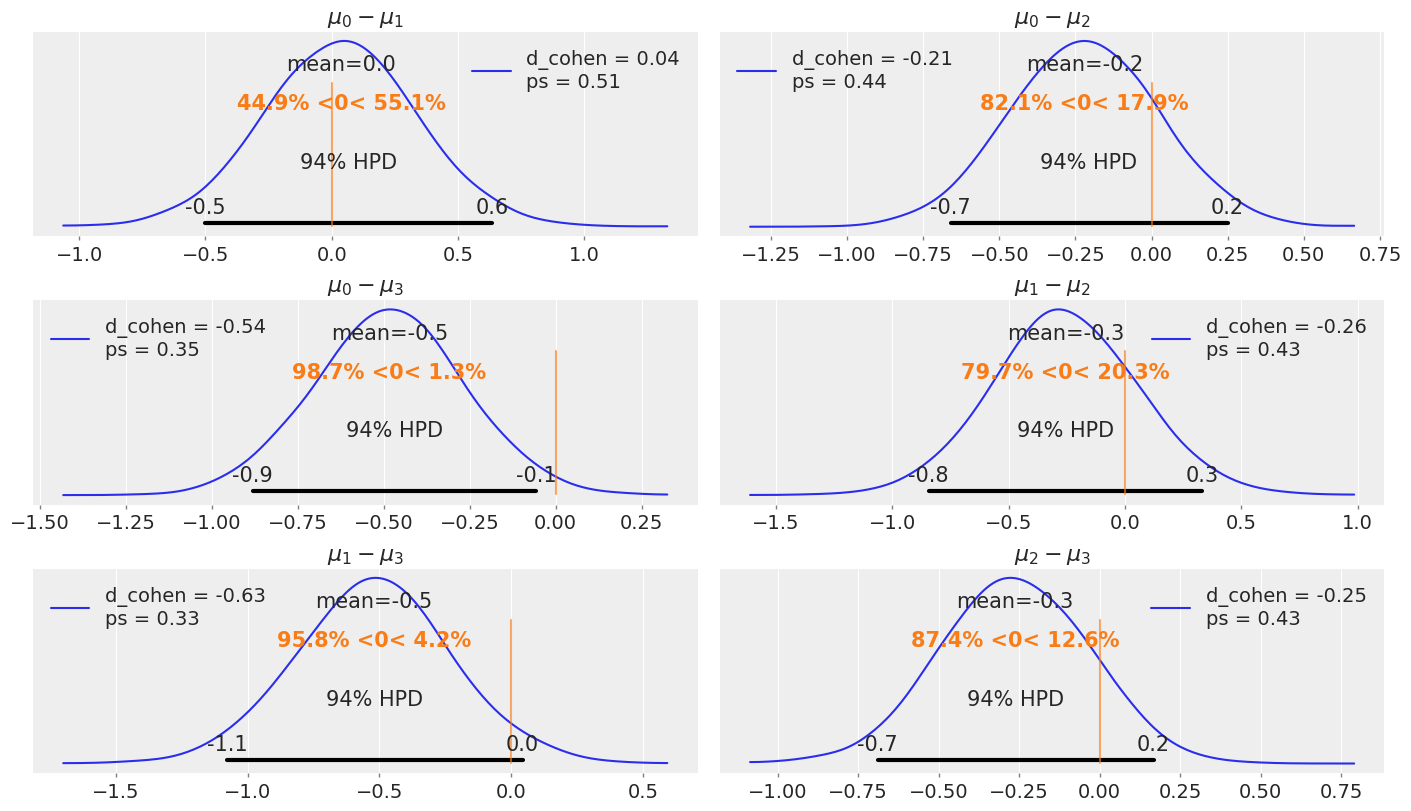

In [283]:
comparison = [ (i,j) for i in range(4) for j in range (i+1, 4)]
pos = [ (k, l) for k in range (3) for l in (0,1)]


_, ax = plt.subplots(3, 2, figsize=(14, 8), constrained_layout=True)

for (i,j), (k,l) in zip(comparison, pos):
    μ_diff = trace_cg['μ'][:,i]-trace_cg['μ'][:,j]
    d_cohen = (μ_diff/(0.5*(np.sqrt((trace_cg['σ'][:,i])**2+(trace_cg['σ'][:,j])**2)))).mean()
    ps = stats.norm.cdf(d_cohen/np.sqrt(2))
    az.plot_posterior(μ_diff, ref_val=0, ax=ax[k,l])
    ax[k,l].plot(0, 0, label=f"d_cohen = {d_cohen:.2f}\nps = {ps:.2f}")
    ax[k,l].set_title(f'$μ_{i}-μ_{j}$')
    ax[k,l].legend()

__Hierarchical Model__:
a model family has parameters θ, which determine a probability distribution over outcomes, and a set of observations y arises as a collection of independent draws from this distribution.
![image](Images/Non-Hierarchical.png)
__Non-Hierarchical Model__:observations fall into a number of clusters, and the distribution over outcomes is determined jointly by (i) parameters θ shared across clusters, and (ii) parameters b which are shared among observations within a cluster, but may be different across clusters.
![image](Images/Hierarchical.png)
    __Case 1__: Each clsuter has its own $\mu_i$ but all the clusters have the same variance $\sigma_y^2$<br>
    In the terminology of the above graph, $\mu_i$=$b_i$ and $\sigma_y^2$=$\theta$<br>
    __Furhter Assumption__: $\mu_i$ is normal distribution with $\mu$ (global mean) and $\sigma_b^2$ (corresponds to node $\Sigma_b$ node in the above picture)<br>

\begin{equation*}
\mu_i \sim \mathcal N (\mu, \sigma_b^2)\\
y_{ij} \sim \mathcal N (\mu_i, \sigma_y^2)
\end{equation*}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ, κ, μ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1306.18draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c284935c0>,
      dtype=object)

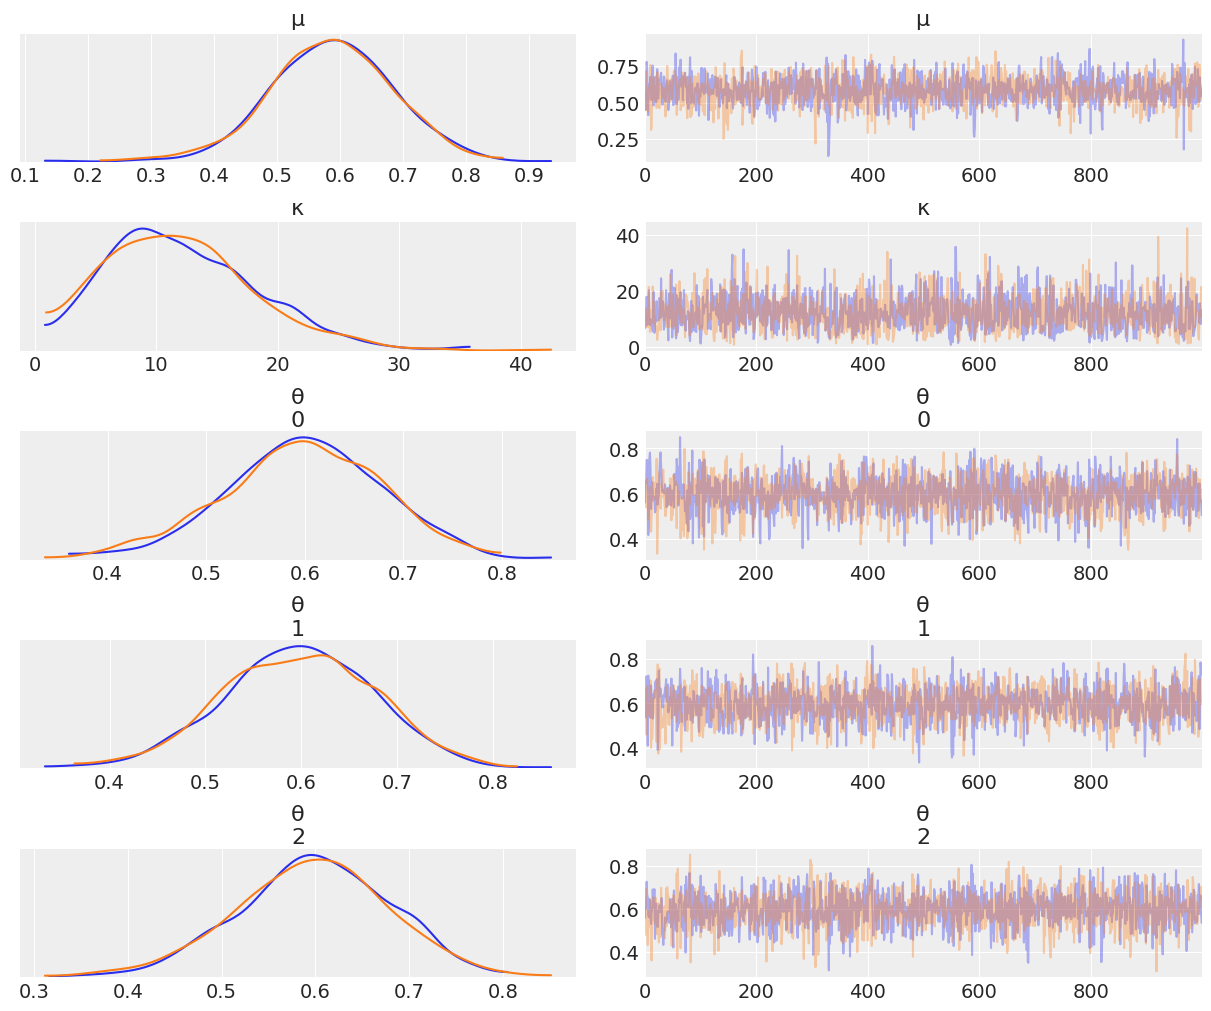

In [300]:
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]

water_data = []
G_idx = np.repeat(np.arange(len(N_samples)), N_samples); G_idx
for i in range(0, len(N_samples)):
    water_data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))
    
with pm.Model() as model_h:
    μ = pm.Beta('μ', 1., 1.)
    κ = pm.HalfNormal('κ', 10)
    
    θ = pm.Beta('θ', alpha=μ*κ, beta=(1.-μ)*κ, shape=len(N_samples))
    y = pm.Bernoulli('y', p=θ[G_idx], observed=water_data)
    
    trace_h = pm.sample(1000, chains=2, cores=2)

az.plot_trace(trace_h)

In [301]:
az.summary(trace_h)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,0.585,0.097,0.409,0.769,0.002,0.002,1561.0,1561.0,1637.0,1295.0,1.0
κ,12.216,6.095,1.322,22.557,0.139,0.098,1933.0,1933.0,1715.0,1113.0,1.0
θ[0],0.598,0.080,0.455,0.755,0.002,0.001,1869.0,1862.0,1873.0,1190.0,1.0
θ[1],0.597,0.078,0.448,0.735,0.002,0.001,1559.0,1541.0,1550.0,1495.0,1.0
θ[2],0.597,0.081,0.436,0.736,0.002,0.001,1988.0,1965.0,1998.0,1464.0,1.0


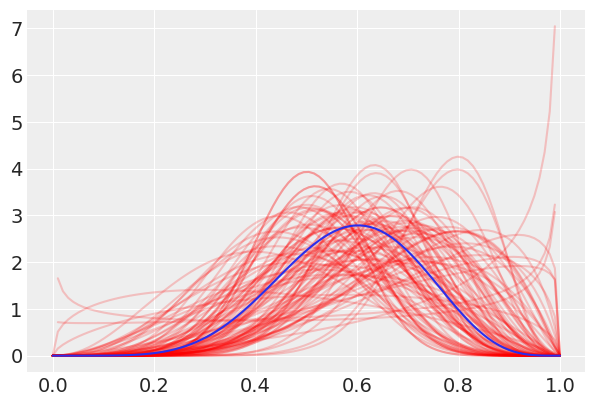

In [306]:
μ_mean = trace_h['μ'].mean()
κ_mean = trace_h['κ'].mean()
x_h = np.linspace(0, 1, 100)
pdf = stats.beta(μ_mean*κ_mean, (1-μ_mean)*κ_mean ).pdf(x_h)

for i in np.random.randint(0, len( trace_h), size=100):
    μ_i = trace_h['μ'][i]
    κ_i = trace_h['κ'][i]
    pdf_i = stats.beta(μ_i*κ_i, (1-μ_i)*κ_i).pdf(x_h)
    plt.plot(x_h, pdf_i, c='r', alpha=0.2)
plt.plot(x_h, pdf)

## Exercise 1
Using PyMC3, change the parameters of the prior beta distribution in our_first_model to match those of the previous chapter. Compare the results to the previous chapter. Replace the beta distribution with a uniform one in the interval [0,1]. Are the results equivalent to the ? Is the sampling slower, faster, or the same? What about using a larger interval such as [-1, 2]? Does the model run? What errors do you get?